In [599]:
from sklearn import datasets
import numpy as np
import pandas as pdf
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
import sympy as sym
from sklearn.cluster import SpectralClustering, KMeans
from scipy.spatial import distance
import sympy as sym

In [600]:
iris = datasets.load_iris()
X = iris.data  
y = iris.target
X.shape

(150, 4)

In [601]:
import time 
t_begin = time.time()
km = KMeans(init='k-means++', n_clusters=3)
km.fit(X)
km.labels_
t_end = time.time()
from sklearn.metrics.cluster import normalized_mutual_info_score
normalized_mutual_info_score(y,km.labels_,average_method='arithmetic')

0.7581756800057784

In [602]:
t_end-t_begin

0.025834083557128906

In [603]:
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(y,km.labels_)

0.7302382722834697

In [604]:
A= pairwise_distances(X, metric="euclidean")
k=4
# get indices and sorted distances
DNN, NN = np.sort(A), np.argsort(A)
NN = NN[:,1:k+1]
DNN = DNN[:,1:k+1]

In [605]:
W = np.zeros((X.shape[0], X.shape[0]))
for i in range(W.shape[0]):
    for j in range(W.shape[0]):
        if (j in NN[i]) or (i in NN[j])  :
            W[i,j]=np.exp(-(A[i,j]**2)/1000000)
#W=(W+W.T)/2
W

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.99999962,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.99999962, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [606]:
# degree matrixz
D = np.diag(np.sum(np.array(W), axis=1))
print('degree matrix:')
print(D)# laplacian matrix
L = D - W
print('laplacian matrix:')
print(L)

degree matrix:
[[8.99999974 0.         0.         ... 0.         0.         0.        ]
 [0.         5.99999977 0.         ... 0.         0.         0.        ]
 [0.         0.         6.99999933 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 6.99999887 0.         0.        ]
 [0.         0.         0.         ... 0.         3.99999916 0.        ]
 [0.         0.         0.         ... 0.         0.         6.99999912]]
laplacian matrix:
[[ 8.99999974  0.          0.         ...  0.          0.
   0.        ]
 [ 0.          5.99999977  0.         ...  0.          0.
   0.        ]
 [ 0.          0.          6.99999933 ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  6.99999887 -0.99999962
   0.        ]
 [ 0.          0.          0.         ... -0.99999962  3.99999916
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   6.99999912]]


In [607]:
# eigenvalues
e, v = np.linalg.eig(L)
idx=np.argsort(e)
e=e[idx]

U = np.array(v.real[:,idx[0:3]])
km = KMeans(init='k-means++', n_clusters=3)
km.fit(U)
km.labels_

from sklearn.metrics.cluster import normalized_mutual_info_score
normalized_mutual_info_score(y,km.labels_,average_method='arithmetic')

0.7776631579462301

In [608]:
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(y,km.labels_)

0.744526430873875

In [609]:
M=np.zeros((150,5,4))
for i in range(0,150):
    M[i]=np.vstack((X[i],X[NN[i]]))
np.dot(M[1].T,np.ones(5))/5, M[1]


(array([4.86, 3.04, 1.44, 0.18]),
 array([[4.9, 3. , 1.4, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.8, 3. , 1.4, 0.3],
        [4.9, 3.1, 1.5, 0.2],
        [4.9, 3.1, 1.5, 0.1]]))

In [610]:
def Z(f):
    Z=np.zeros(4)
    for i in range(0,4):
        Z[i]=np.dot(f.T[i],np.ones(5))/5
    return Z
z=np.zeros((150,4))
for i in range(0,150):
    z[i]=Z(M[i])
z[29] ,X[29]
z.shape

(150, 4)

In [611]:
Z=np.matrix(z)
Z[1]

matrix([[4.86, 3.04, 1.44, 0.18]])

In [612]:
k=20
A1= pairwise_distances(Z, metric="euclidean")
# get indices and sorted distances
DNN1, NN1 = np.sort(A1), np.argsort(A1)
NN1 = NN1[:,1:k+1]
DNN1 = DNN1[:,1:k+1]
#W=csr_matrix((30, 30)).toarray()
NN1[144],NN1[145]

(array([143, 144, 140, 124, 112, 109, 100, 104, 139, 136, 102, 141, 145,
        115, 148, 128, 132, 137, 108, 147]),
 array([141, 110, 139, 147, 115, 148, 112, 104, 124, 140, 137, 116, 111,
        143, 144, 120, 128, 132,  77, 103]))

In [613]:

W1 = np.zeros((Z.shape[0], Z.shape[0]))
for i in range(W1.shape[0]):
    for j in range(W1.shape[0]):
        if (j in NN1[i]) or (i in NN1[j]):
            W1[i,j]=np.exp(-(A1[i,j]**2)/1000)
                
#W1=(W1+W1.T)/2


In [614]:
# degree matrixz
D1 = np.diag(np.sum(np.array(W1), axis=1))
print('degree matrix:')
print(D1)# laplacian matrix
L1 = D1 - W1
print('laplacian matrix:')
print(L1)

degree matrix:
[[29.99619907  0.          0.         ...  0.          0.
   0.        ]
 [ 0.         20.99803135  0.         ...  0.          0.
   0.        ]
 [ 0.          0.         19.99866926 ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ... 27.99267506  0.
   0.        ]
 [ 0.          0.          0.         ...  0.         22.99436445
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
  19.99640091]]
laplacian matrix:
[[29.99619907  0.          0.         ...  0.          0.
   0.        ]
 [ 0.         20.99803135 -0.9999384  ...  0.          0.
   0.        ]
 [ 0.         -0.9999384  19.99866926 ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ... 27.99267506 -0.99986921
   0.        ]
 [ 0.          0.          0.         ... -0.99986921 22.99436445
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
  19.99640091]]


In [615]:
S=np.zeros((X.shape[0],X.shape[0]))
for i in range(X.shape[0]):
    for j in range(X.shape[0]):
        if (j in NN[i]):
            S[i,j]=1
            S[i,i]=1
S=S/5                      

In [616]:
L1=np.dot(np.dot(S.T,L1),S)
LL=L+L1


In [617]:
# eigenvalues
e1, v = np.linalg.eig(LL)
idx=np.argsort(e1)
e1=e1[idx]
#v=v[:,idx[1:2]]
e1

array([-7.31844616e-15,  6.55803496e-03,  8.25591153e-01,  2.34046147e+00,
        2.90361508e+00,  4.57855570e+00,  4.58207310e+00,  4.72528285e+00,
        4.77655009e+00,  4.88149231e+00,  4.90395534e+00,  4.92452608e+00,
        4.97829925e+00,  4.99999720e+00,  4.99999917e+00,  5.03479903e+00,
        5.06082015e+00,  5.07701471e+00,  5.08214442e+00,  5.09460612e+00,
        5.11133636e+00,  5.13078992e+00,  5.17777652e+00,  5.18412565e+00,
        5.24254774e+00,  5.24371624e+00,  5.28234723e+00,  5.32627214e+00,
        5.39168727e+00,  5.40879363e+00,  5.42643273e+00,  5.44314742e+00,
        5.46087304e+00,  5.52039794e+00,  5.54650688e+00,  5.58667085e+00,
        5.60722964e+00,  5.69594748e+00,  5.70952150e+00,  5.75374956e+00,
        5.78379510e+00,  5.83706145e+00,  5.86357139e+00,  5.89932308e+00,
        5.97292813e+00,  6.05551412e+00,  6.08863696e+00,  6.10183643e+00,
        6.17931672e+00,  6.23592936e+00,  6.27432338e+00,  6.28205201e+00,
        6.36192079e+00,  

In [618]:
U = np.array(v.real[:,idx[0:3]])
km = KMeans(init='k-means++', n_clusters=3)
km.fit(U)
km.labels_


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [619]:
from sklearn.metrics.cluster import normalized_mutual_info_score
normalized_mutual_info_score(y,km.labels_,average_method='arithmetic')

0.9011219347136156

In [620]:
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(y,km.labels_)

0.9221767019765943

In [621]:
import time 
t_begin = time.time()
A= pairwise_distances(X, metric="euclidean")
k=4
DNN, NN = np.sort(A), np.argsort(A)
NN = NN[:,1:k+1]
DNN = DNN[:,1:k+1]
M=np.zeros((X.shape[0],5,X.shape[1]))
for i in range(0,X.shape[0]):
    M[i]=np.vstack((X[i],X[NN[i]]))
W = np.zeros((X.shape[0], X.shape[0]))
for i in range(W.shape[0]):
    for j in range(W.shape[0]):
        if (j in NN[i])or(i in NN[j]) :
            W[i,j]=np.exp(-(A[i,j]**2)/1000)
        else:
            W[i][j]=0
D = np.diag(np.sum(np.array(W), axis=1))
L = D - W
def Z(f):
    Z=np.zeros(X.shape[1])
    for i in range(0,X.shape[1]):
        Z[i]=np.dot(f.T[i],np.ones(5))/5
    return Z
z=np.zeros((X.shape[0],X.shape[1]))
for i in range(0,X.shape[0]):
    z[i]=Z(M[i])
Z=np.matrix(z)
k=16
A1= pairwise_distances(Z, metric="euclidean")
DNN1, NN1 = np.sort(A), np.argsort(A1)
NN1 = NN1[:,1:k+1]
DNN1 = DNN1[:,1:k+1]
W = np.zeros((Z.shape[0], Z.shape[0]))
for i in range(W.shape[0]):
    for j in range(W.shape[0]):
        if (j in NN1[i])or(i in NN[j]) :
            W[i][j] =np.exp(-(A[i,j]**2)/100)
        else:
            W[i][j]=0
S=np.zeros((X.shape[0],X.shape[0]))
for i in range(X.shape[0]):
    for j in range(X.shape[0]):
        if j in NN[i]:
            S[i,j]=1
            S[i,i]=1                          
S=S/5
D = np.diag(np.sum(np.array(W), axis=1))
LL = D - W
LL=np.dot(np.dot(S.T,LL),S)
L=LL+L
e1, v = np.linalg.eig(L)
idx=np.argsort(e1)
e1=e1[idx]
U = np.array(v.real[:,idx[0:3]])
km = KMeans(init='k-means++', n_clusters=3)
km.fit(U)
t_end = time.time()
t_end-t_begin

0.3466830253601074

In [622]:
from sklearn.metrics.cluster import normalized_mutual_info_score
normalized_mutual_info_score(y,km.labels_,average_method='arithmetic')

0.9192316125079704

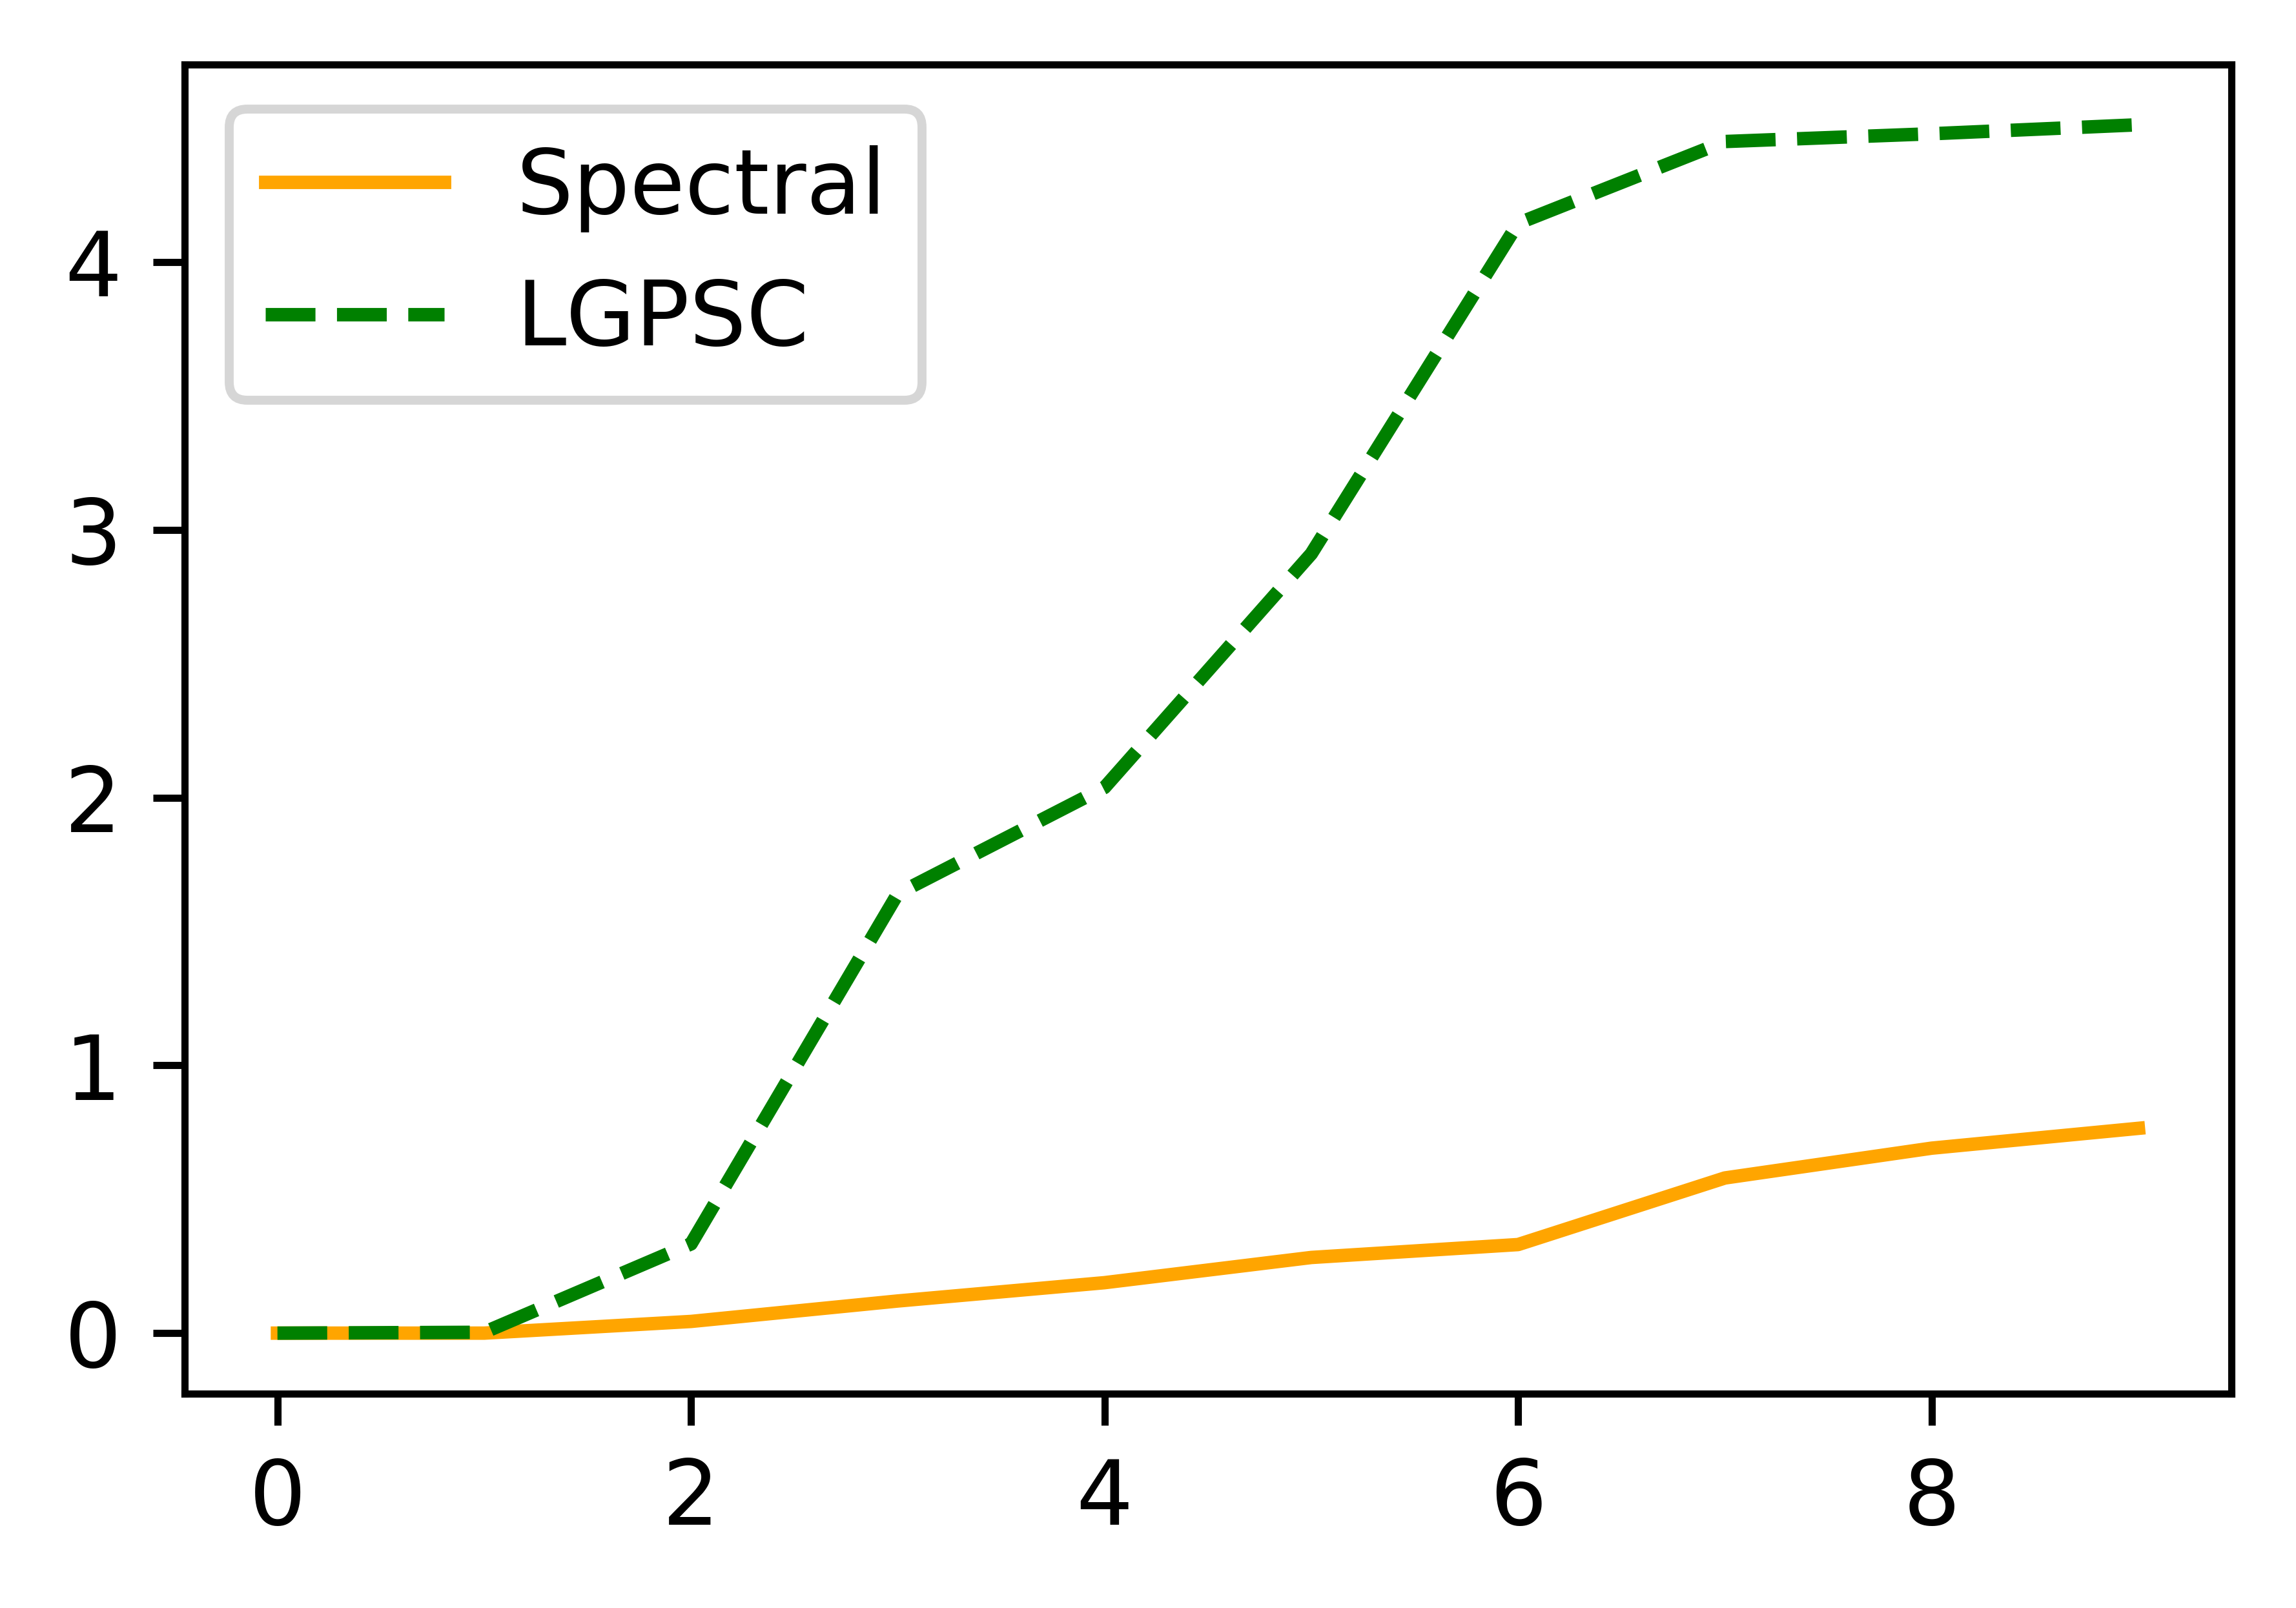

In [623]:
fig = plt.figure(figsize=[9, 6], dpi=1000)
ax1 = plt.subplot(222)
plt.plot(e.real[0:10],color='orange',label='Spectral')
plt.plot(e1.real[0:10],'g--',label='LGPSC')
plt.legend(prop={'size': 10})